Demonstrating Linear Regression and Polynomial Regression



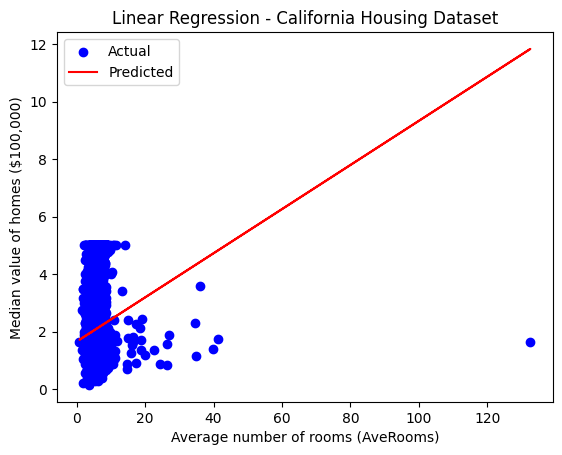

Linear Regression - California Housing Dataset
Mean Squared Error: 1.2923314440807299
R^2 Score: 0.013795337532284901


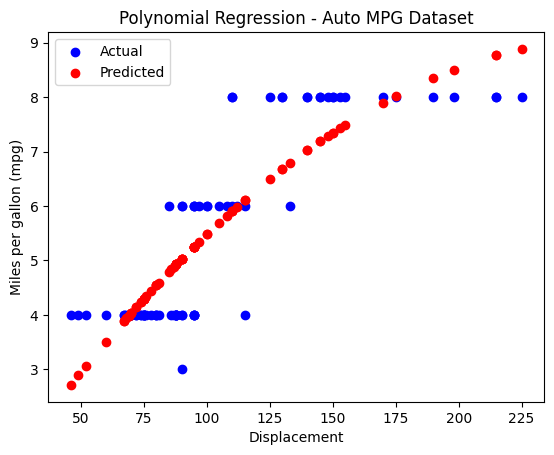

Polynomial Regression - Auto MPG Dataset
Mean Squared Error: 0.743149055720586
R^2 Score: 0.7505650609469626


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression_california():
    housing = fetch_california_housing(as_frame=True)
    X = housing.data[["AveRooms"]] 
    y = housing.target 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    plt.scatter(X_test, y_test, color="blue", label = "Actual")
    plt.plot(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Average number of rooms (AveRooms)")
    plt.ylabel("Median value of homes ($100,000)")
    plt.title("Linear Regression - California Housing Dataset")
    plt.legend()
    plt.show()

    print("Linear Regression - California Housing Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))


def polynomial_regression_auto_mpg():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
    data = pd.read_csv(url, sep = r'\s+', names = column_names, na_values = "?")
    data = data.dropna()

    X = data["displacement"].values.reshape(-1, 1) 
    y = data["mpg"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
    poly_model.fit(X_train, y_train)

    y_pred = poly_model.predict(X_test)

    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.scatter(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Displacement")
    plt.ylabel("Miles per gallon (mpg)")
    plt.title("Polynomial Regression - Auto MPG Dataset")
    plt.legend()
    plt.show()

    print("Polynomial Regression - Auto MPG Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))


if __name__ == "__main__":
    linear_regression_california()
    polynomial_regression_auto_mpg()